# COVIT-19 Data Analisys

## Get Public DataSets for COVIT-19
Extract last data published

In [14]:
import urllib
import datetime
dt = datetime.datetime.today()
year = dt.strftime('%Y')
month = dt.strftime('%m')
day = dt.strftime('%d')
# Mundial Data
outfilename = f'COVIT-19-{dt.year}{dt.month}{dt.day}.xls'
url_of_file = f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{year}-{month}-{day}.xlsx'
print(url_of_file)
urllib.request.urlretrieve(url_of_file, outfilename)

# Mapped Data
outfilename = f'COVIT-19-{dt.year}{dt.month}{dt.day}-Confirmed.csv'
url_of_file = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
print(url_of_file)
urllib.request.urlretrieve(url_of_file, outfilename)
outfilename = f'COVIT-19-{dt.year}{dt.month}{dt.day}-Death.csv'
url_of_file = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
print(url_of_file)
urllib.request.urlretrieve(url_of_file, outfilename)
outfilename = f'COVIT-19-{dt.year}{dt.month}{dt.day}-Recovered.csv'
url_of_file = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
print(url_of_file)
urllib.request.urlretrieve(url_of_file, outfilename)

https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-19.xlsx
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv


('COVIT-19-2020320-Recovered.csv', <http.client.HTTPMessage at 0x7f5ec8595400>)

## Prepare and Clean Data
Build DataSet to work

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Read Data
dt = datetime.datetime.today()
file = f'COVIT-19-{dt.year}{dt.month}{dt.day}.xls'
df = pd.read_excel(file)

# Prepare Dataset
data = pd.DataFrame(df, columns= ['DateRep', 'Day','Month', 'Year', 'Cases', 'Deaths', 'Countries and territories'])
data = data.rename(columns={"DateRep": "Date", "Countries and territories": "Country"})

# Filter Dataset
data = data[data['Cases'] > 0]
data['Period'] = data['Month']*100+data['Day']
data = data.sort_values(['Country', 'Date'], ascending=[True, True])

# Indexar DataSet
data['Id'] = data.groupby(['Country']).cumcount()

# Sumarizar
ant = data.iloc[0]['Cases']
antd = data.iloc[0]['Deaths']
country = data.iloc[0]['Country']
i = 0
c = []
d = []
for i in range(i, len(data)):
  Cases = (data.iloc[i]['Cases'] + (ant if i > 0 else 0)) if country == data.iloc[i]['Country'] else data.iloc[i]['Cases']
  Deaths = (data.iloc[i]['Deaths'] + (antd if i > 0 else 0)) if country == data.iloc[i]['Country'] else data.iloc[i]['Deaths']
  c.append(Cases)
  d.append(Deaths)
  ant = Cases
  antd = Deaths
  country = data.iloc[i]['Country']

data["Total_Cases"] = c
data["Total_Deaths"] = d

data.head()

,Date,Day,Month,Year,Cases,Deaths,Country,Period,Id,Total_Cases,Total_Deaths
13,2020-02-25,25,2,2020,1,0,Afghanistan,225,0,1,0
6,2020-03-08,8,3,2020,3,0,Afghanistan,308,1,4,0
5,2020-03-11,11,3,2020,3,0,Afghanistan,311,2,7,0
4,2020-03-15,15,3,2020,3,0,Afghanistan,315,3,10,0
3,2020-03-16,16,3,2020,6,0,Afghanistan,316,4,16,0


# Compare Data Propagation Mexico vs Spain, Italy and EU By days
Compare COVIT-19 propagation in Mexico with Spain, Italy and EU

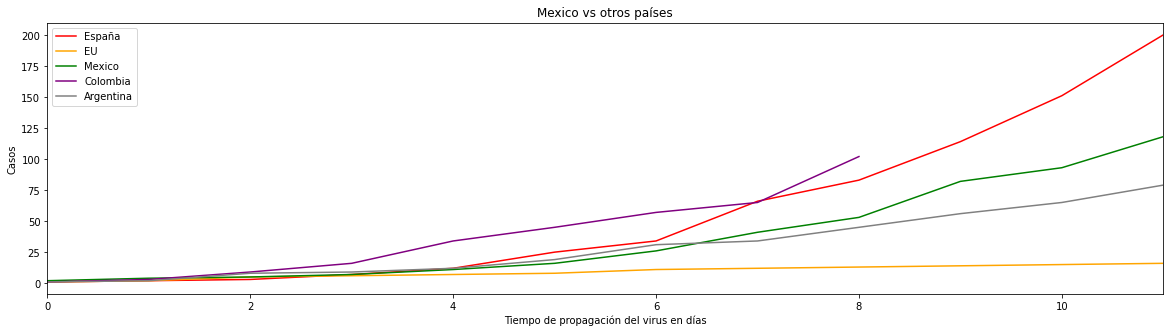

,Id,Period,Country,Cases,Deaths,Total_Cases,Total_Deaths,Period_es,Cases_es,Deaths_es,Total_Cases_es,Cases_eu,Deaths_eu,Total_Cases_eu,Total_Deaths_eu,Period_it,Cases_it,Deaths_it,Total_Cases_it,Total_Deaths_it
0,0,229,Mexico,2,0,2,0,201,1,0,1,1,0,1,0,131,3,0,3,0
1,1,301,Mexico,2,0,4,0,210,1,0,2,1,0,2,0,222,14,0,17,0
2,2,302,Mexico,1,0,5,0,225,1,0,3,3,0,5,0,223,62,2,79,2
3,3,309,Mexico,2,0,7,0,226,4,0,7,1,0,6,0,224,53,0,132,2
4,4,312,Mexico,4,0,11,0,227,5,0,12,1,0,7,0,225,97,4,229,6
5,5,313,Mexico,5,0,16,0,228,13,0,25,1,0,8,0,226,93,5,322,11
6,6,314,Mexico,10,0,26,0,229,9,0,34,3,0,11,0,227,78,1,400,12
7,7,315,Mexico,15,0,41,0,301,32,0,66,1,0,12,0,228,250,5,650,17
8,8,316,Mexico,12,0,53,0,302,17,0,83,1,0,13,0,229,238,4,888,21
9,9,317,Mexico,29,0,82,0,303,31,0,114,1,0,14,0,301,240,8,1128,29


In [25]:
# Filter by country
mexico = data[(data['Country'] == 'Mexico')]
spain = data[(data['Country'] == 'Spain')]
spain = spain[spain['Id'] < len(mexico) ]
eu = data[(data['Country'] == 'United_States_of_America')]
eu = eu[eu['Id'] < len(mexico) ]
italy = data[(data['Country'] == 'Italy')]
italy = italy[italy['Id'] < len(mexico) ]
colombia = data[(data['Country'] == 'Colombia')]
colombia = colombia[colombia['Id'] < len(mexico) ]
argentina = data[(data['Country'] == 'Argentina')]
argentina = argentina[argentina['Id'] < len(mexico) ]

result_compare = mexico.merge(spain, left_on=['Id'], right_on=['Id'], suffixes=('', '_es'))
result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Country_es','Cases_es','Deaths_es','Total_Cases_es','Total_Deaths_es']]
result_compare = result_compare.merge(eu, left_on=['Id'], right_on=['Id'], suffixes=('', '_eu'))
result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Cases_es','Deaths_es','Total_Cases_es','Period_eu','Cases_eu','Deaths_eu','Total_Cases_eu','Total_Deaths_eu']]
result_compare = result_compare.merge(italy, left_on=['Id'], right_on=['Id'], suffixes=('', '_it'))
result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Cases_es','Deaths_es','Total_Cases_es','Cases_eu','Deaths_eu','Total_Cases_eu','Total_Deaths_eu','Period_it','Cases_it','Deaths_it','Total_Cases_it','Total_Deaths_it']]

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Total_Cases', color='red', ax=ax, title='Mexico vs otros países', figsize=(20,5), label="España")
#italy.plot(kind='line',x='Id',y='Total_Cases', color='blue', ax=ax)
eu.plot(kind='line', x='Id',y='Total_Cases', color='orange', ax=ax, label="EU")
mexico.plot(kind='line',x='Id',y='Total_Cases', color='green', ax=ax, label="Mexico")
colombia.plot(kind='line',x='Id',y='Total_Cases', color='purple', ax=ax, label="Colombia")
argentina.plot(kind='line',x='Id',y='Total_Cases', color='gray', ax=ax, label="Argentina")
ax.set_xlabel("Tiempo de propagación del virus en días")
ax.set_ylabel("Casos")
ax.can_zoom()
plt.show()

result_compare.head(50)

## Evolution of the Virus
Next days virus propagation

In [0]:
# Building

# Test for build interactive Dashboard

In [0]:
from IPython.display import display
from IPython.html.widgets import *
from ipywidgets import widgets

text = widgets.Text()
display(text)

def handle_submit(sender):
  print(text.value)

text.on_submit(handle_submit)

def f(x):
  print(x)

interact(f,x=10)